# Gig Workers SLA Analytics
## Step 2: Data Understanding & Exploratory Data Analysis (EDA)

This notebook performs **data understanding and exploratory data analysis** on the synthetic dataset generated in Step 1.  
The goal is to identify patterns, distributions, and insights that will guide **SLA evaluation, statistical calibration, and worker performance analysis**.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## Load Synthetic Dataset

Load the synthetic task-level dataset created in Step 1.  
This dataset contains:
- `worker_id` – Unique worker identifier
- `task_id` – Unique task identifier
- `task_complexity` – Low / Medium / High
- `time_taken_minutes` – Task completion time in minutes
- `accuracy` – Task accuracy (0–1)
- `task_date` – Task completion date

In [2]:
# Load synthetic data
df = pd.read_csv("simulated_worker_tasks.csv", parse_dates=["task_date"])

# Display first 5 rows
df.head()

,task_id,worker_id,task_date,task_complexity,time_taken_minutes,accuracy
0,77016b53-3aa3-497a-b042-4246e5a9583e,W_001,2024-01-01,Low,5.28,0.990
1,7f65a185-9675-4d6d-974c-c0b27805270a,W_001,2024-01-01,Medium,7.30,0.946
2,a78aa64d-4a37-4105-baab-125b5d293c4e,W_001,2024-01-01,Low,4.43,0.952
3,2d08d6c7-c351-40f4-af67-5a62f3a250ce,W_001,2024-01-01,Medium,5.41,0.913
4,c236a814-63f0-4035-8e30-b4642282a1d8,W_001,2024-01-01,Medium,7.36,0.908


## Dataset Overview

- Check **shape, column info, summary statistics**, and missing values.
- Helps verify data integrity before starting analysis.

In [3]:
# Dataset shape
print(f"Dataset shape: {df.shape}")

# Column information
print(df.info())

# Summary statistics
print(df.describe())

# Missing values
print(df.isnull().sum())

Dataset shape: (22249, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22249 entries, 0 to 22248
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   task_id             22249 non-null  object        
 1   worker_id           22249 non-null  object        
 2   task_date           22249 non-null  datetime64[ns]
 3   task_complexity     22249 non-null  object        
 4   time_taken_minutes  22249 non-null  float64       
 5   accuracy            22249 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.0+ MB
None
                           task_date  time_taken_minutes      accuracy
count                          22249        22249.000000  22249.000000
mean   2024-01-15 13:18:32.409546496            7.315525      0.939589
min              2024-01-01 00:00:00            1.600000      0.743000
25%              2024-01-08 00:00:00            4.990000  

## Task Distribution per Worker

Visualize the **number of tasks handled by each worker** to understand workload distribution.

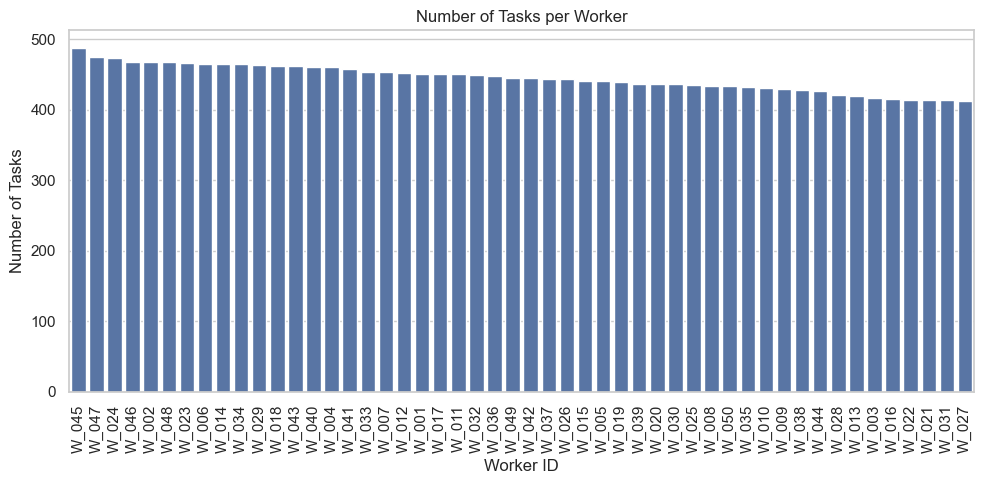

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="worker_id", order=df['worker_id'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of Tasks per Worker")
plt.xlabel("Worker ID")
plt.ylabel("Number of Tasks")
plt.tight_layout()
plt.show()

## Accuracy Analysis

- Visualize overall **accuracy distribution**.
- Explore **accuracy by task complexity** to see if more complex tasks affect accuracy.

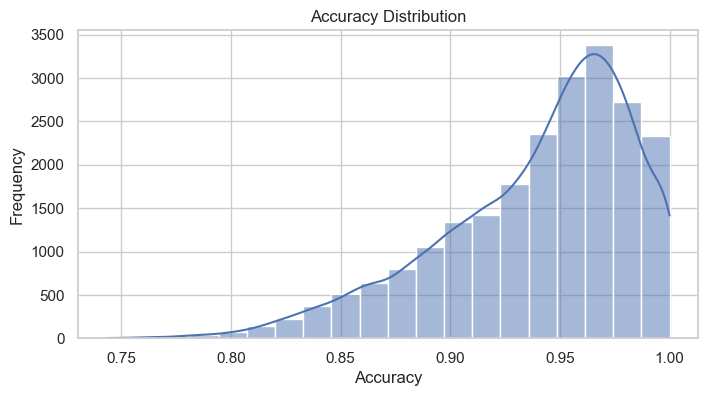

C:\Users\admin\AppData\Local\Temp\ipykernel_5928\1363372170.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="task_complexity", y="accuracy", palette="Set2")


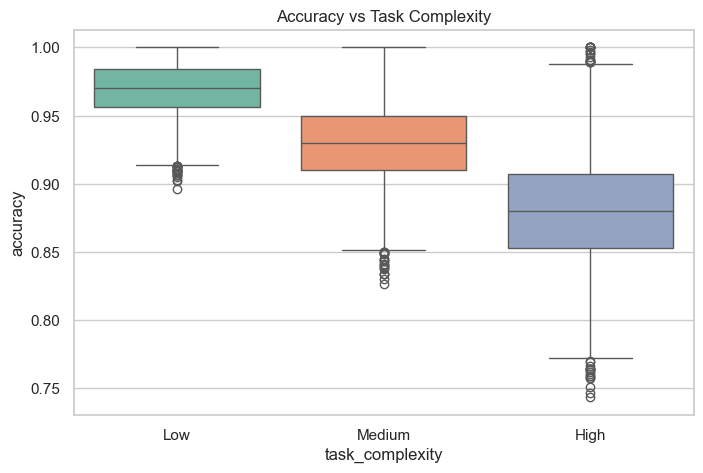

In [5]:
# Accuracy distribution
plt.figure(figsize=(8,4))
sns.histplot(df['accuracy'], bins=20, kde=True)
plt.title("Accuracy Distribution")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()

# Accuracy by task complexity
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="task_complexity", y="accuracy", palette="Set2")
plt.title("Accuracy vs Task Complexity")
plt.show()

## Task Completion Time Analysis

- Visualize overall **time taken distribution**.
- Compare **time taken across task complexity** levels.

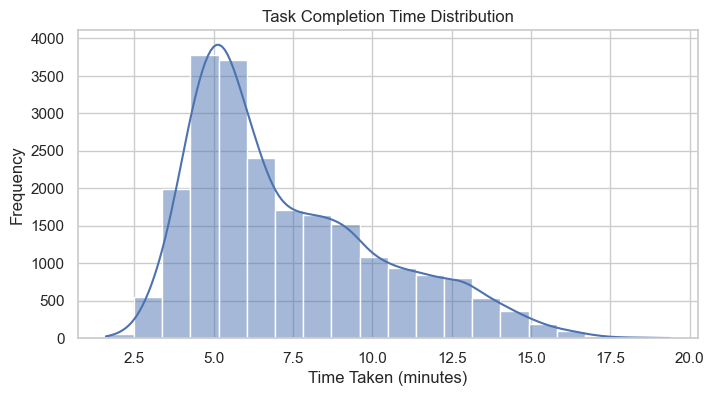

C:\Users\admin\AppData\Local\Temp\ipykernel_5928\1996127416.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="task_complexity", y="time_taken_minutes", palette="Set3")


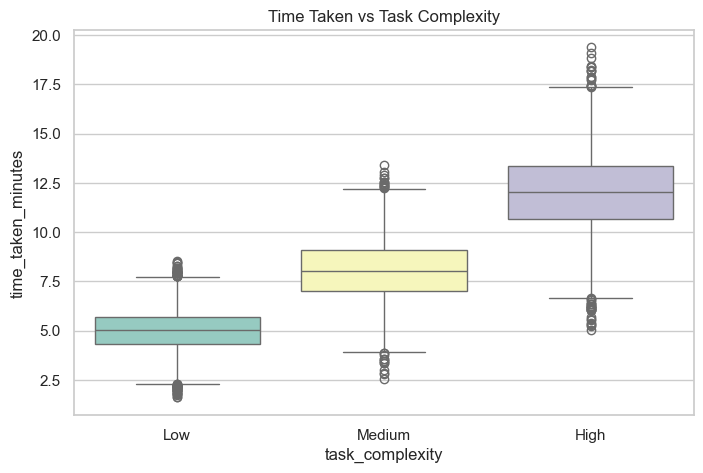

In [6]:
# Time taken distribution
plt.figure(figsize=(8,4))
sns.histplot(df['time_taken_minutes'], bins=20, kde=True)
plt.title("Task Completion Time Distribution")
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Frequency")
plt.show()

# Time taken vs task complexity
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="task_complexity", y="time_taken_minutes", palette="Set3")
plt.title("Time Taken vs Task Complexity")
plt.show()

## Correlation Analysis

Examine the **relationship between task completion time and accuracy** to identify potential trade-offs.

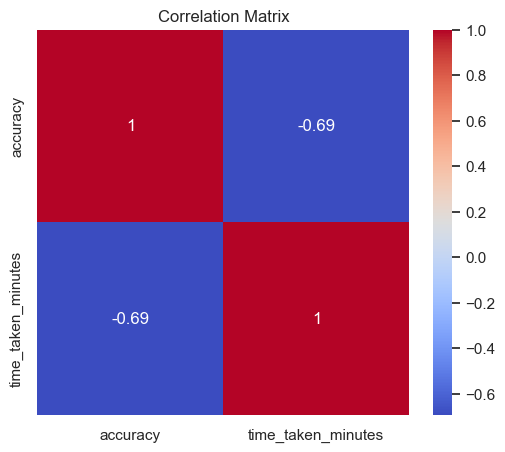

In [7]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['accuracy','time_taken_minutes']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Key Insights from EDA

1. Task distribution across workers varies; some workers handle more tasks than others.  
2. Accuracy generally ranges between 0.7 and 1.0, with median around 0.92.  
3. High complexity tasks tend to take longer and slightly reduce accuracy.  
4. Time taken and accuracy are weakly negatively correlated, indicating some trade-off.  
5. No missing values; the dataset is clean and ready for **SLA evaluation** and **statistical calibration**.